In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_9.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_9.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,3.305745e-11,1.600350e-09,3.865388e-11,0.830992,2.167874e-11,3.407756e-13,0.000001,1.554412e-09,...,3.480031e-09,9.862215e-28,9.592530e-17,1.590220e-17,3.108731e-08,1.305516e-05,-9.375127e-04,6.667192e-27,4.174224e-27,2.700932e-28
1,0.000017,0.405009,1.279385e-10,3.042180e-09,1.455089e-10,0.830992,8.325099e-11,2.535110e-12,0.000003,6.214506e-09,...,7.571297e-09,5.046207e-27,2.179629e-16,4.851371e-17,4.732119e-08,1.342603e-05,-9.377784e-04,4.702229e-26,2.965482e-26,1.965430e-27
2,0.000025,0.405009,2.785754e-10,4.341772e-09,3.080856e-10,0.830992,1.796867e-10,8.226818e-12,0.000004,1.397822e-08,...,1.301924e-08,1.613235e-26,3.913028e-16,1.065977e-16,6.400532e-08,1.378951e-05,-9.380437e-04,1.855081e-25,1.203093e-25,7.983975e-27
3,0.000033,0.405009,4.794360e-10,5.513983e-09,5.155602e-10,0.830992,3.062741e-10,1.886846e-11,0.000005,2.484297e-08,...,1.968635e-08,3.922543e-26,6.173461e-16,1.952767e-16,8.112979e-08,1.414412e-05,-9.383079e-04,5.310069e-25,3.568553e-25,2.351165e-26
4,0.000042,0.405009,7.256034e-10,6.572046e-09,7.588203e-10,0.830992,4.587356e-10,3.570188e-11,0.000006,3.880620e-08,...,2.744961e-08,7.996438e-26,8.974615e-16,3.186314e-16,9.868298e-08,1.448869e-05,-9.385704e-04,1.240377e-24,8.664399e-25,5.647018e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,...,1.712135e-20,6.296395e-22,1.551557e-22,2.951290e-25,1.087006e-26,9.753863e-29,8.453351e-31,9.027561e-21,2.823392e-21,2.482081e-22
119995,0.999967,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,...,1.759502e-20,5.912848e-22,1.580777e-22,2.863334e-25,1.170767e-26,9.740253e-29,8.404507e-31,8.961062e-21,2.879610e-21,2.586174e-22
119996,0.999975,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,...,1.959055e-20,6.550324e-22,1.553376e-22,2.978830e-25,1.092375e-26,9.704308e-29,9.244621e-31,9.132958e-21,2.809599e-21,2.383862e-22
119997,0.999983,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,...,1.830466e-20,5.590658e-22,1.614782e-22,2.950393e-25,1.105607e-26,9.804339e-29,9.127830e-31,8.671841e-21,2.849583e-21,2.489591e-22


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

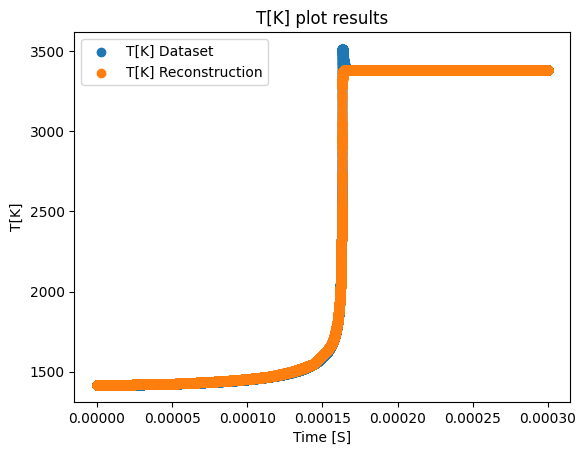

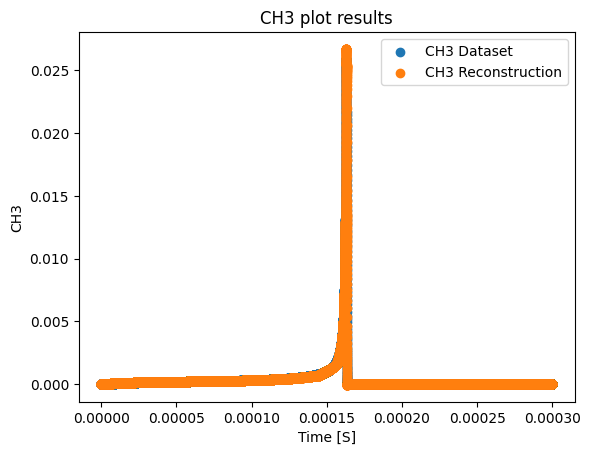

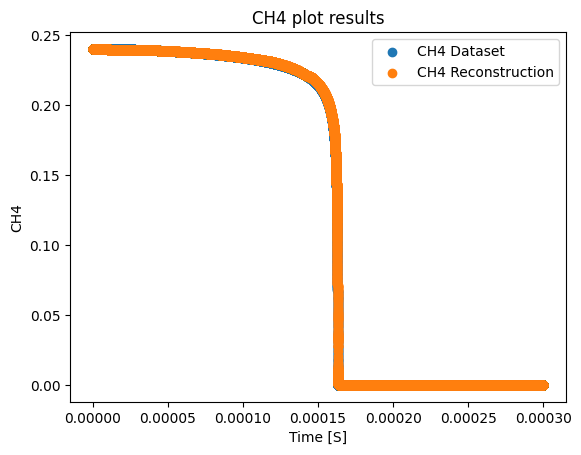

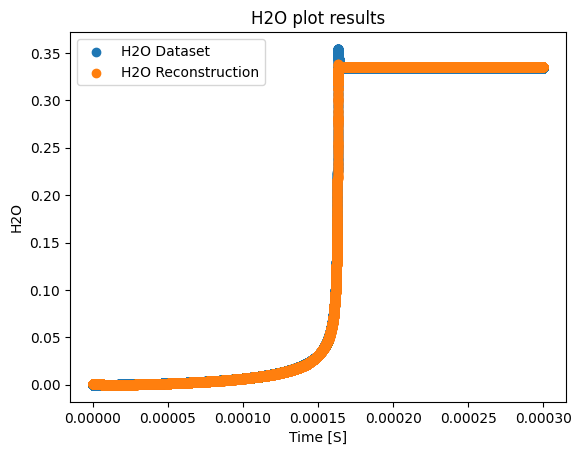

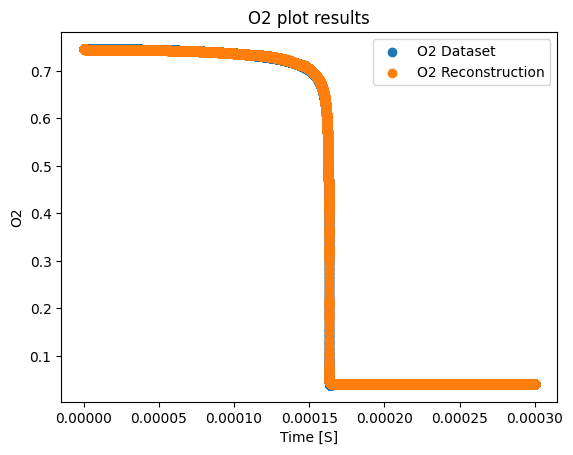

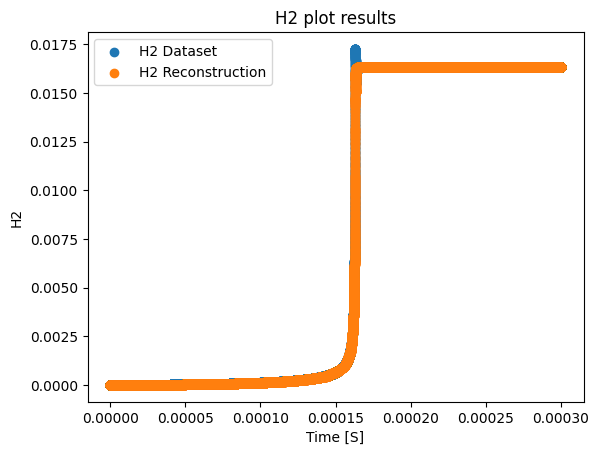

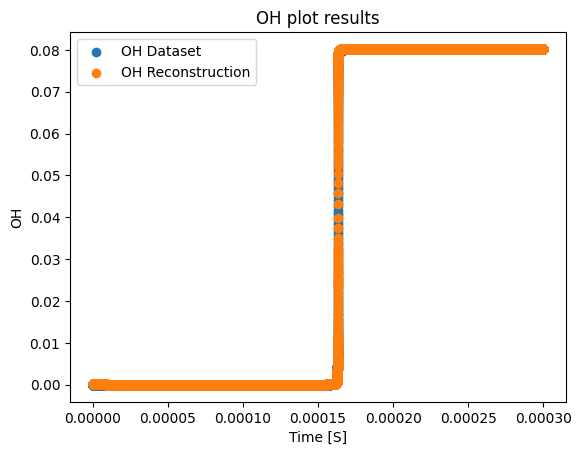

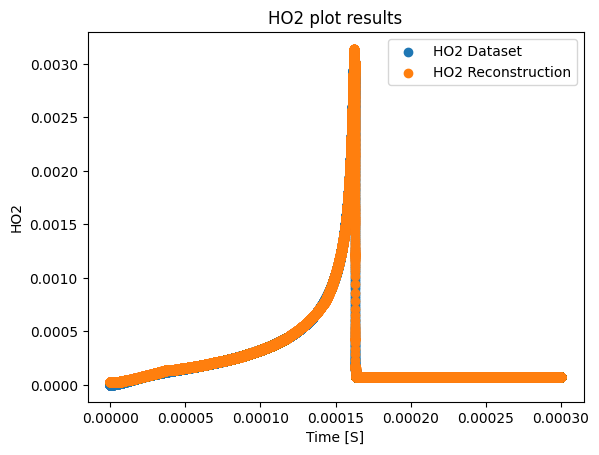

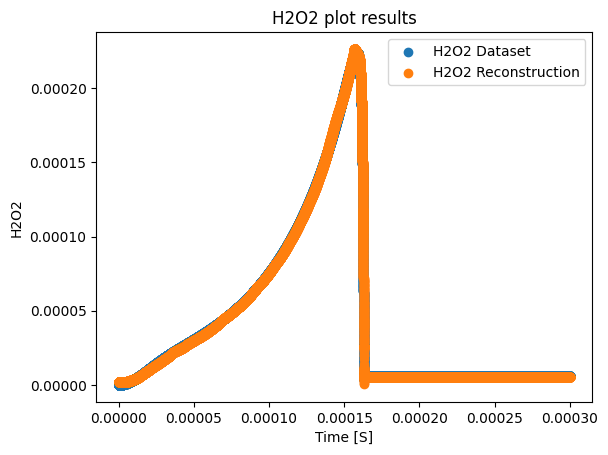

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

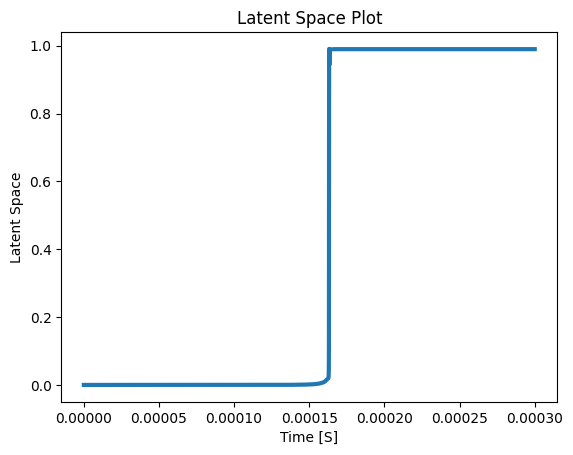

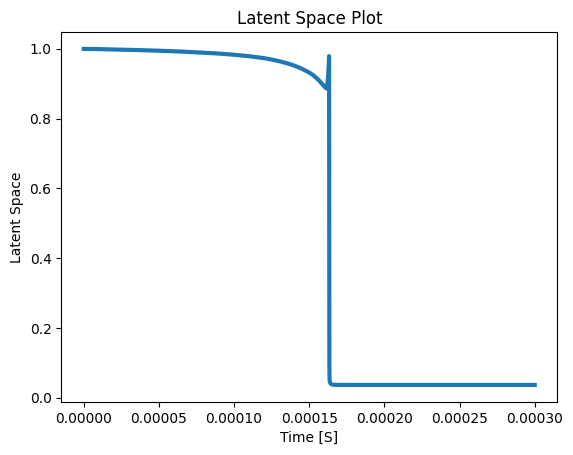

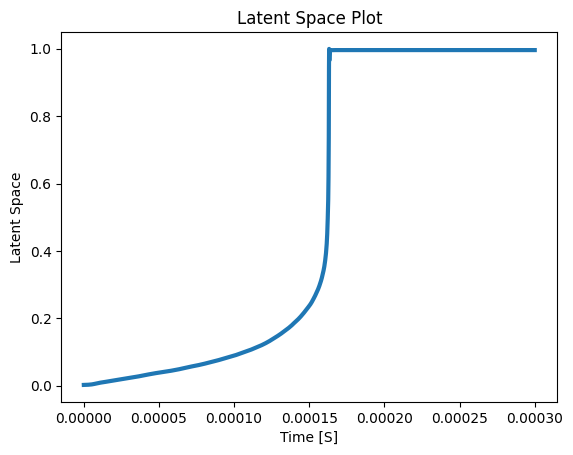

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,3.305745e-11,1.600350e-09,3.865388e-11,0.830992,2.167874e-11,3.407756e-13,0.000001,1.554412e-09,4.219821e-35,...,8.998796e-10,5.942691e-29,2.375286e-17,2.391617e-18,1.531172e-08,1.267868e-05,-9.372475e-04,2.319346e-28,1.585672e-28,9.116606e-30
1,0.405009,1.279385e-10,3.042180e-09,1.455089e-10,0.830992,8.325099e-11,2.535110e-12,0.000003,6.214506e-09,2.022081e-33,...,3.480031e-09,9.862215e-28,9.592530e-17,1.590220e-17,3.108731e-08,1.305516e-05,-9.375127e-04,6.667192e-27,4.174224e-27,2.700932e-28
2,0.405009,2.785754e-10,4.341772e-09,3.080856e-10,0.830992,1.796867e-10,8.226818e-12,0.000004,1.397822e-08,3.184550e-32,...,7.571297e-09,5.046207e-27,2.179629e-16,4.851371e-17,4.732119e-08,1.342603e-05,-9.377784e-04,4.702229e-26,2.965482e-26,1.965430e-27
3,0.405009,4.794360e-10,5.513983e-09,5.155602e-10,0.830992,3.062741e-10,1.886846e-11,0.000005,2.484297e-08,2.687944e-31,...,1.301924e-08,1.613235e-26,3.913028e-16,1.065977e-16,6.400532e-08,1.378951e-05,-9.380437e-04,1.855081e-25,1.203093e-25,7.983975e-27
4,0.405009,7.256034e-10,6.572046e-09,7.588203e-10,0.830992,4.587356e-10,3.570188e-11,0.000006,3.880620e-08,2.606224e-31,...,1.968635e-08,3.922543e-26,6.173461e-16,1.952767e-16,8.112979e-08,1.414412e-05,-9.383079e-04,5.310069e-25,3.568553e-25,2.351165e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,2.860601e-06,...,1.820911e-20,5.862491e-22,1.593609e-22,2.973285e-25,1.107203e-26,9.633668e-29,9.602592e-31,9.232087e-21,2.819580e-21,2.386337e-22
119995,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,2.860601e-06,...,1.712135e-20,6.296395e-22,1.551557e-22,2.951290e-25,1.087006e-26,9.753863e-29,8.453351e-31,9.027561e-21,2.823392e-21,2.482081e-22
119996,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,2.860601e-06,...,1.759502e-20,5.912848e-22,1.580777e-22,2.863334e-25,1.170767e-26,9.740253e-29,8.404507e-31,8.961062e-21,2.879610e-21,2.586174e-22
119997,0.965514,1.086382e+00,1.081733e+00,4.956021e-01,0.045866,7.991104e-01,9.656873e-01,0.019352,2.258688e-02,2.860601e-06,...,1.959055e-20,6.550324e-22,1.553376e-22,2.978830e-25,1.092375e-26,9.704308e-29,9.244621e-31,9.132958e-21,2.809599e-21,2.383862e-22


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.826824,0.909110,0.909907,0.909905,-0.832689,0.909906,0.830863,-0.120800,-0.095488,0.824936,...,-0.182910,-0.177903,-0.180571,-0.180580,-0.181538,-0.265910,-0.017259,-0.179043,-0.179689,-0.179618
1,-0.820321,-0.910068,-0.911134,-0.911131,0.826173,-0.911133,-0.824120,0.125212,0.090309,-0.818167,...,0.177548,0.174305,0.176643,0.176628,0.176364,0.261432,0.012362,0.175408,0.175935,0.175905
2,0.835976,0.906220,0.906353,0.906350,-0.841763,0.906352,0.840097,-0.114444,-0.102209,0.834650,...,-0.190345,-0.185018,-0.187997,-0.188006,-0.188968,-0.273640,-0.024105,-0.186463,-0.187112,-0.187040


H     0.909907
OH    0.909906
O     0.909905
H2    0.909110
CO    0.905485
Name: 0, dtype: float64
CH4      0.911131
O2       0.826173
C2H6     0.397517
CH3w     0.342794
H2O2w    0.323404
Name: 1, dtype: float64
H     0.906353
OH    0.906352
O     0.906350
H2    0.906220
CO    0.902281
Name: 2, dtype: float64


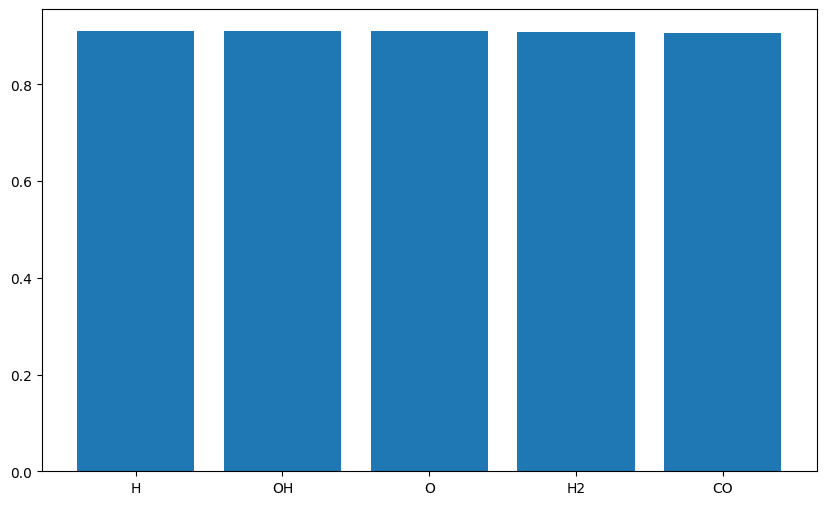

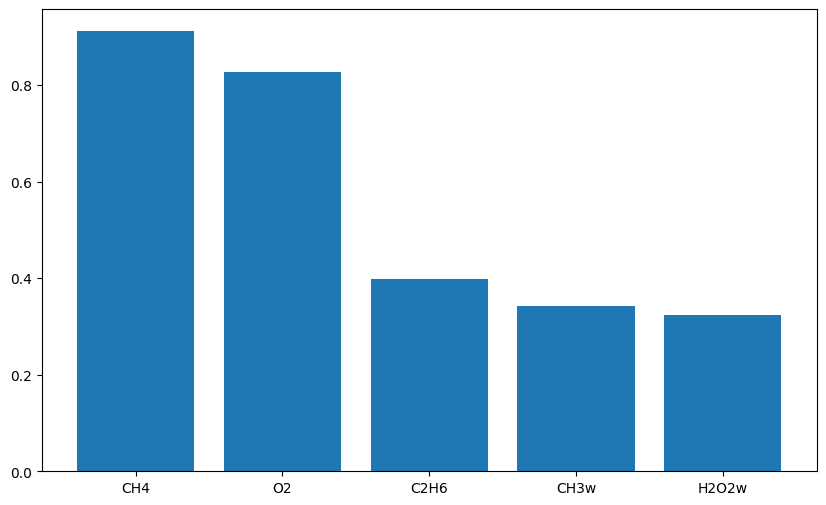

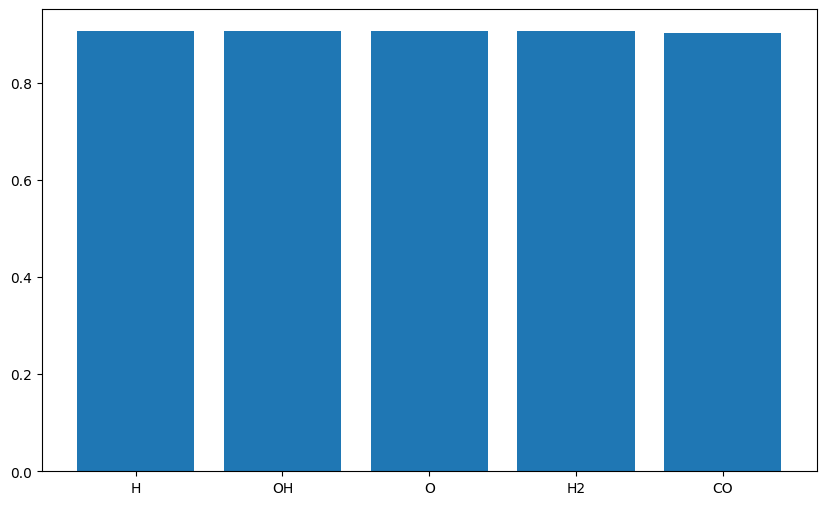

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.914569,0.963143,0.963659,0.963659,-0.916007,0.963659,0.914833,-0.339664,-0.391159,0.910972,...,-0.583502,-0.575002,-0.580888,-0.580901,-0.582110,-0.605061,-0.152655,-0.577532,-0.578953,-0.578802
1,-0.911191,-0.964043,-0.964798,-0.964798,0.912627,-0.964798,-0.911304,0.341776,0.387684,-0.906467,...,0.578205,0.572009,0.577450,0.577428,0.577111,0.601086,0.149698,0.574496,0.575754,0.575659
2,0.920078,0.961440,0.961526,0.961526,-0.921454,0.961526,0.920385,-0.336001,-0.395730,0.916843,...,-0.588720,-0.579801,-0.586099,-0.586112,-0.587324,-0.610320,-0.157148,-0.582751,-0.584168,-0.584017


H     0.963659
OH    0.963659
O     0.963659
H2    0.963143
CO    0.960815
Name: 0, dtype: float64
CH4      0.964798
O2       0.912627
C2H6     0.692545
H2O2w    0.648573
CH3w     0.648112
Name: 1, dtype: float64
H     0.961526
OH    0.961526
O     0.961526
H2    0.961440
CO    0.958913
Name: 2, dtype: float64


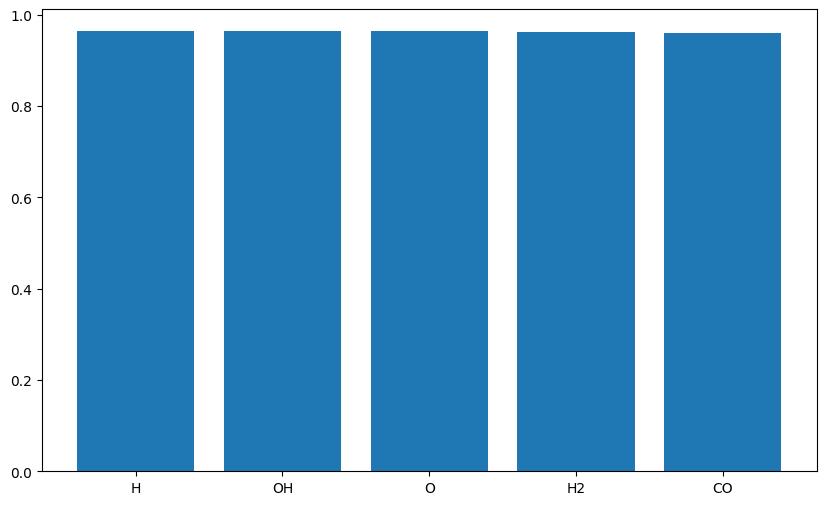

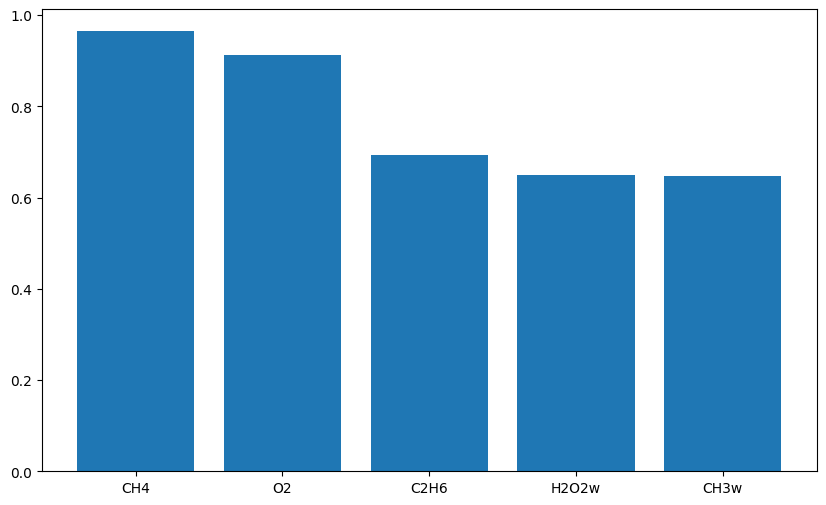

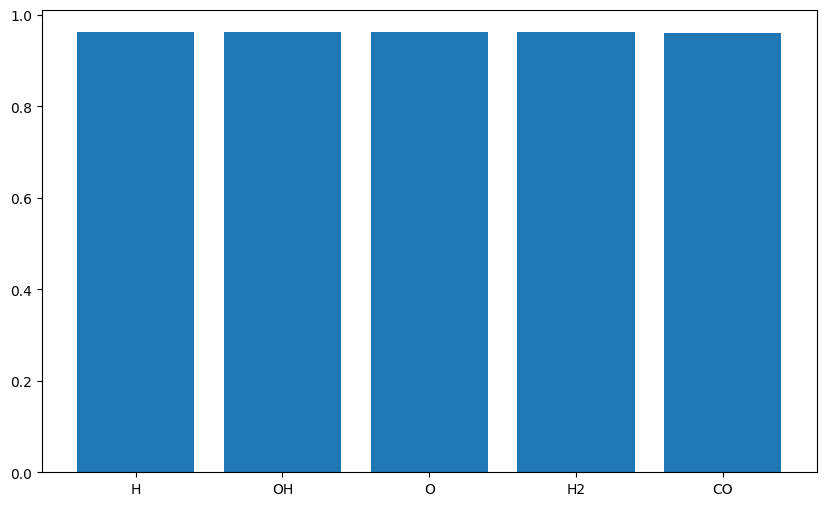

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.826812,0.909112,0.909909,0.909907,-0.832675,0.909908,0.830882,-0.120828,-0.095500,0.824922,...,-0.182907,-0.177911,-0.180567,-0.180576,-0.181534,-0.265908,-0.017265,-0.179051,-0.179697,-0.179626
1,-0.820317,-0.910070,-0.911136,-0.911133,0.826167,-0.911135,-0.824113,0.125228,0.090326,-0.818160,...,0.177549,0.174315,0.176636,0.176622,0.176364,0.261428,0.012375,0.175412,0.175936,0.175904
2,0.835997,0.906223,0.906355,0.906353,-0.841749,0.906354,0.840117,-0.114472,-0.102255,0.834636,...,-0.190341,-0.185059,-0.187993,-0.188003,-0.188964,-0.273637,-0.024111,-0.186471,-0.187120,-0.187048


H     0.909909
OH    0.909908
O     0.909907
H2    0.909112
CO    0.905487
Name: 0, dtype: float64
CH4      0.911133
O2       0.826167
C2H6     0.397519
CH3w     0.342780
H2O2w    0.323415
Name: 1, dtype: float64
H     0.906355
OH    0.906354
O     0.906353
H2    0.906223
CO    0.902317
Name: 2, dtype: float64


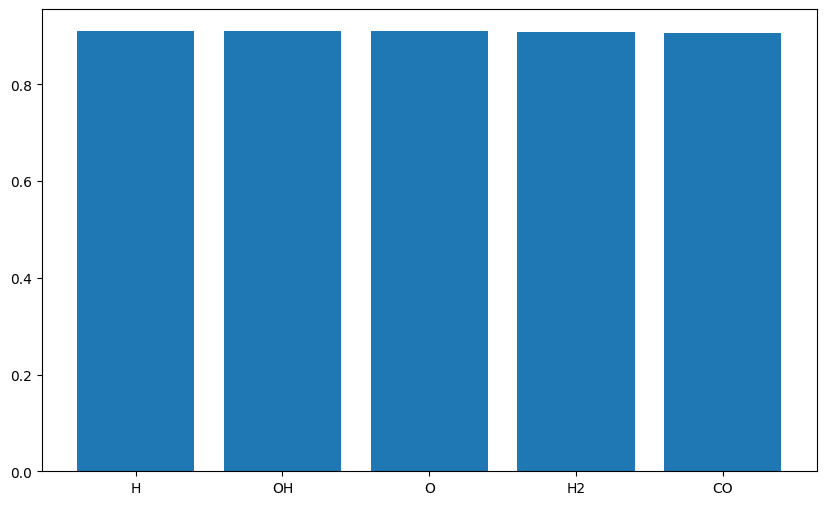

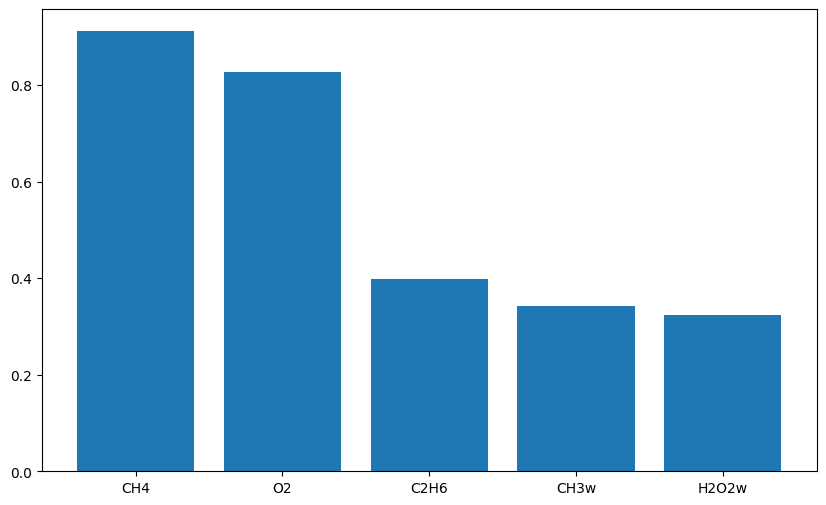

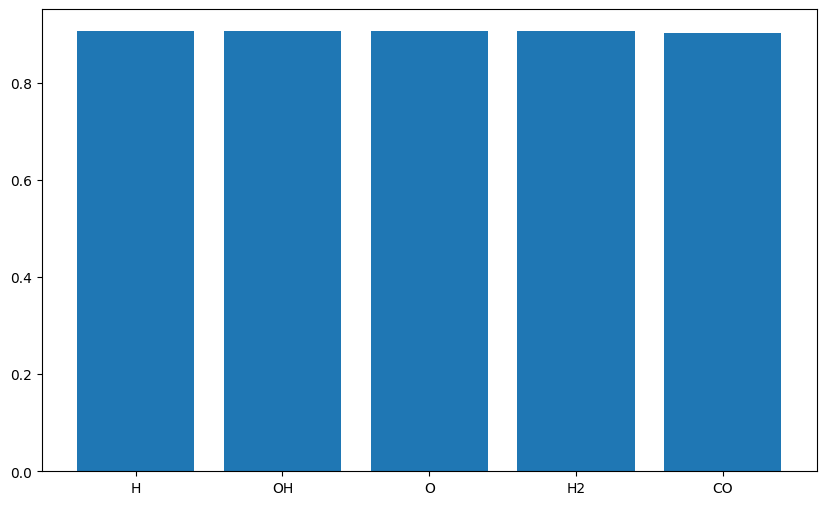

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)